In [49]:
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
import numpy as np

## Попробуем посмотреть, как кластеризуется цвет картинки

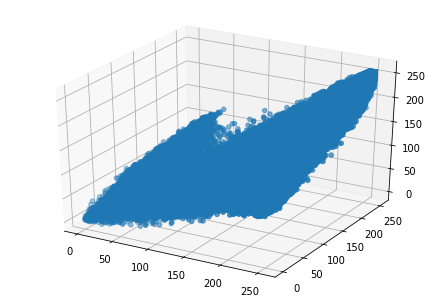

In [48]:
#читаем картинку
def img_into_pixels(path_to_img):
    img = cv2.imread(path_to_img)

#конвертируем из BGR в RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#раскладываем картинку на три канала
    r, g, b = cv2.split(img)
    r = r.flatten()
    g = g.flatten()
    b = b.flatten()
    
    return r, g, b

r, g, b = img_into_pixels('annakarenina_1967.jpg')

#изображаем 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

## Кластеризуется плохо - у нас получилось непонятное месиво, которое, когда мы захотим раскрасить, ничего нам не даст + раскраска в данном случае требует очень много затрат (и времени, и мощности), так что это бессмысленно.

In [66]:
class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=5):
        self.CLUSTERS = clusters
        self.IMAGE = image
        
    def dominantColors(self):
        '''Эта функция выдает параметры R, G, B для самых превалирующих на картинке цветов'''
    
        #read image
        img = cv2.imread(self.IMAGE)
        
        #convert to rgb from bgr
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)
    
#     def rgb_to_hex(self, rgb): '''Эта функция занималась раскраской того 3D месива выше'''
#         return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    
#     def plotClusters(self):
#         #plotting 
#         fig = plt.figure()
#         ax = Axes3D(fig)        
#         for label, pix in tqdm(zip(self.LABELS, self.IMAGE)):
#             ax.scatter(pix[0], pix[1], pix[2], color = self.rgb_to_hex(self.COLORS[label]))
#         plt.show()
    
    def plotHistogram(self): 
        '''Эта функция строит гистограмму с превалирующими цветами в картинке, и это гораздо быстрее, чем 
        раскрашивать месиво'''
        
        #labels form 0 to no. of clusters
        numLabels = np.arange(0, self.CLUSTERS+1)
       
        #create frequency count tables    
        (hist, _) = np.histogram(self.LABELS, bins = numLabels)
        hist = hist.astype("float")
        hist /= hist.sum()
        
        #appending frequencies to cluster centers
        colors = self.COLORS
        
        #descending order sorting as per frequency count
        colors = colors[(-hist).argsort()]
        hist = hist[(-hist).argsort()] 
        
        #creating empty chart
        chart = np.zeros((50, 500, 3), np.uint8)
        start = 0
        
        #creating color rectangles
        for i in range(self.CLUSTERS):
            end = start + hist[i] * 500
            
            #getting rgb values
            r = colors[i][0]
            g = colors[i][1]
            b = colors[i][2]
            
            #using cv2.rectangle to plot colors
            cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
            start = end
        
        #display chart
        plt.figure()
        plt.axis("off")
        plt.imshow(chart)
        plt.show()

In [45]:
img = 'annakarenina_1967.jpg'
clusters = 5
dc = DominantColors(img, clusters) 
colors = dc.dominantColors()
print(colors)

[[241 229 214]
 [ 79  69  76]
 [ 27  21  22]
 [196 163 143]
 [172  95  77]]


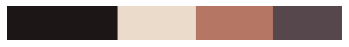

In [41]:
img = 'annakarenina_1967.jpg'
clusters = 4
dc = DominantColors(img, clusters)
colors = dc.dominantColors()
dc.plotHistogram()